### <b>실전 프로젝트 - CNN을 활용한 풍경(Scene) 이미지 분류</b>

* 한 장의 풍경 이미지가 주어졌을 때, 어떠한 카테고리(category)에 속하는지 맞히는 <b>분류 모델</b>을 만드세요.
* 다음의 세 가지 대표적인 CNN 모델을 실습합니다.
    1. [LeNet (1998)](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
    2. [AlexNet (2012 NIPS)](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)
    3. [ResNet (2016 CVPR)](https://arxiv.org/abs/1512.03385)
* 성능을 올릴 수 있는 두 가지 심화 기법을 실습합니다.
    1. [Mixup (ICLR 2018)](https://arxiv.org/abs/1710.09412): 데이터 증진 기법의 일종으로 정확도를 높입니다.
    2. Transfer Learning: 학습 속도와 정확도를 모두 향상시킬 수 있습니다.
* 본 프로젝트는 <b>총 7개의 문제</b>로 구성됩니다.
    * <b>Problem</b>이라고 명시된 부분의 소스코드만 작성합니다.
    * <b>알아보기</b>라고 명시된 부분은 단순히 읽고 실행하면 됩니다.
    * 단계적으로 문제를 풀어나가는 과정에서 CNN 기반의 고성능 분류 모델을 학습하는 방법을 이해할 수 있습니다.
* (참고) 본 실습 코드에서는 빠른 결과 도출을 위해 30~50 epoch 정도만 학습합니다.
    * 풍경 데이터셋에 대하여 완전히 학습시키기 위해서는 100 epoch 이상의 학습이 필요합니다.

#### <b>(알아보기) 지난 프로젝트 Review</b>

* 지난 프로젝트에서는 Scene Classification 데이터셋에 대하여 간단한 기계학습 모델을 학습했습니다.
    1. 선형 분류 모델(Linear Models for Classification)
    2. KNN (K-Nearest Neighbors)
* 하지만, 두 기법 모두 정확도(accuracy)가 <b>60% 미만</b>으로 낮게 나온다는 <b>한계점</b>이 존재했습니다.
* 본 실습에서는 CNN을 이용해 정확도를 <b>최소한 90% 이상으로</b> 높입니다.
    * 실제로 현업에서 많이 사용되는 테크닉을 이용해 최대한 정확도를 끌어올려 봅시다.

#### <b>Problem 1. 데이터셋 다운로드 및 분석하기</b>

* [PyTorch용 Scene Classification 데이터셋 저장소](https://github.com/ndb796/Scene-Classification-Dataset-Split)
    * 참고: [원본 Kaggle 데이터셋 링크](https://www.kaggle.com/nitishabharathi/scene-classification)
    * 본 데이터셋은 <b>저작권이 없는(No Copyright)</b> [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) 라이센스를 따라므로, 자유롭게 변형할 수 있습니다.
* PyTorch에서 곧바로 불러와 사용할 수 있도록 구성된 데이터셋입니다.
* 다음의 명령어를 이용해 데이터셋을 다운로드할 수 있습니다.

<pre>
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb796/Scene-Classification-Dataset-Split 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset-Split 
</pre>

In [1]:
# seed 고정
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os

def seed_everything(seed):
    #random.seed(seed)
    #os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
seed_everything(123)

c:\Users\minki\miniconda3\envs\dl_venv\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
c:\Users\minki\miniconda3\envs\dl_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device

device(type='cuda')

In [3]:
%pwd

'c:\\Users\\minki\\Desktop\\06.09_Scene_Classifiaction'

In [4]:
# 깃허브에서 데이터셋 다운로드하기
#!git clone https://github.com/ndb796/Scene-Classification-Dataset-Split 

# 폴더 안으로 이동
%cd Scene-Classification-Dataset-Split 

c:\Users\minki\Desktop\06.09_Scene_Classifiaction\Scene-Classification-Dataset-Split


#### <b>(알아보기) 데이터셋 설명</b>

* 본 PyTorch용 장면(scene) 데이터셋은 17,034개의 다양한 <b>자연 경치(scene)</b> 이미지로 구성되어 있습니다.
* 총 6개의 클래스(class)로 구성됩니다.

<pre>
클래스 0. 빌딩(buildings)
클래스 1. 숲(forests)
클래스 2. 빙하(glacier)
클래스 3. 산(mountains)
클래스 4. 바다(sea)
클래스 5. 거리(street)
</pre>

* 각 이미지는 공통적으로 64 X 64 크기를 가집니다.
* 데이터셋 폴더 구성은 다음과 같습니다.

<pre>
Dataset/
    train/
        buildings/
        forests/
        glacier/
        mountains/
        sea/
        streat/
    val/
        buildings/
        forests/
        glacier/
        mountains/
        sea/
        streat/
</pre>

#### <b>(알아보기) 클래스별 학습 이미지 개수 출력하기</b>

* 클래스별 데이터의 개수를 계산합니다.
    * os 라이브러리의 os.listdir()를 이용하여 이미지 폴더에 존재하는 파일 이름 목록을 얻을 수 있습니다.
    * 클래스의 개수는 6개입니다.
* 총 학습 데이터의 개수는 13,627개입니다.

<pre>
클래스 0. 빌딩(buildings): 2,105개
클래스 1. 숲(forests): 2,205개
클래스 2. 빙하(glacier): 2,363개
클래스 3. 산(mountains): 2,438개
클래스 4. 바다(sea): 2,224개
클래스 5. 거리(street): 2,292개
</pre>

* 총 검증 데이터의 개수는 3,407개입니다.

<pre>
클래스 0. 빌딩(buildings): 523개
클래스 1. 숲(forests): 540개
클래스 2. 빙하(glacier): 594개
클래스 3. 산(mountains): 599개
클래스 4. 바다(sea): 560개
클래스 5. 거리(street): 591개
</pre>

In [5]:
import os

classes = ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']
train_path = 'train/'
val_path = 'val/'

print("[ 학습 데이터셋 ]")
for i in range(6):
    print(f'클래스 {i}의 개수: {len(os.listdir(train_path + classes[i]))}')

print("[ 검증 데이터셋 ]")
for i in range(6):
    print(f'클래스 {i}의 개수: {len(os.listdir(val_path + classes[i]))}')

[ 학습 데이터셋 ]
클래스 0의 개수: 2105
클래스 1의 개수: 2205
클래스 2의 개수: 2363
클래스 3의 개수: 2438
클래스 4의 개수: 2224
클래스 5의 개수: 2292
[ 검증 데이터셋 ]
클래스 0의 개수: 523
클래스 1의 개수: 540
클래스 2의 개수: 594
클래스 3의 개수: 599
클래스 4의 개수: 560
클래스 5의 개수: 591


#### <b>(알아보기) 데이터셋 불러오기</b>

* PyTorch의 <b>ImageFolder 라이브러리</b>를 이용하여 <b>자신만의 데이터셋</b>을 불러올 수 있습니다.
* ImageFolder 라이브러리는 다음과 같이 <b>계층적인 폴더 구조</b>에서 데이터셋을 불러올 때 사용할 수 있습니다.
    * 각 클래스명(class name)으로 된 폴더에 여러 장의 이미지가 들어가 있는 구조입니다.

<pre>
dataset/
    class 0/
        0.jpg
        1.jpg
        ...
    class 1/
        0.jpg
        1.jpg
        ...
    ...
    class 9/
        0.jpg
        1.jpg
        ...
</pre>

* 기본적인 <b>데이터 증진(data augmentation)</b> 기법을 사용합니다.
    * [RandomResizedCrop()](https://pytorch.org/vision/stable/transforms.html): 학습 시기에 랜덤으로 이미지의 일부를 잘라내어 특정 크기로 변형합니다.
    * [RandomHorizontalFlip()](https://pytorch.org/vision/stable/transforms.html): 학습 시기에 랜덤으로 이미지를 좌우 반전합니다.
* <b>정규화(normalization)를</b> 진행합니다.
    * 일반적으로 많이 사용되는 ImageNet 데이터셋의 설정을 이용합니다.

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object
device

device(type='cuda', index=0)

In [7]:
import torch
from torchvision import datasets, transforms


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object

transforms_train = transforms.Compose([
    transforms.RandomResizedCrop((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_val = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_path, transforms_train)
val_dataset = datasets.ImageFolder(val_path, transforms_val)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, num_workers=2)

print('Training dataset size:', len(train_dataset))
print('Validation dataset size:', len(val_dataset))

class_names = train_dataset.classes
print('Class names:', class_names)

Training dataset size: 13627
Validation dataset size: 3407
Class names: ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']


#### <b>(알아보기) 이미지 시각화하기</b>

* PyTorch로 불러온 데이터(torch.Tensor 객체)를 시각화해 봅시다.
* Google Colab에 출력하기 위해서 NumPy 형태로 변형한 뒤에 Matplotlib을 이용합니다.
    * torch.Tensor는 (Channel, Height, Width) 형식을 가집니다.
    * numpy 객체는 (Height, Width, Channel) 형식을 가집니다.

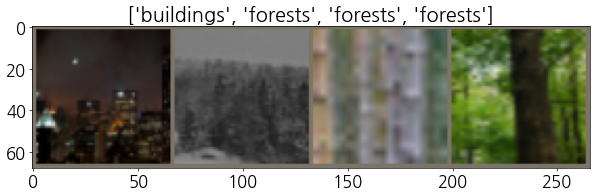

In [8]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt


# 화면에 출력되는 이미지 크기를 적절하게 조절하기
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})


def imshow(image, title):
    # torch.Tensor => numpy 변환하기
    image = image.numpy().transpose((1, 2, 0))
    # 이미지 정규화(normalization) 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    # 화면에 이미지 출력하기
    plt.imshow(image)
    plt.title(title)
    plt.show()


# 학습 데이터셋에서 하나의 배치를 불러와 보기
iterator = iter(train_dataloader)

# 현재 배치에 포함된 이미지를 출력하기
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])
imshow(out, title=[class_names[x] for x in classes[:4]])

#### <b>Problem 2. Convolution 연산 이해하기</b>

* Convolution 연산의 동작 원리를 이해할 필요가 있습니다.
* <b>[그림 예시]</b> 아래 그림에서는 stride가 1이고, padding이 0일 때의 Convolution 연산 예시를 보입니다.

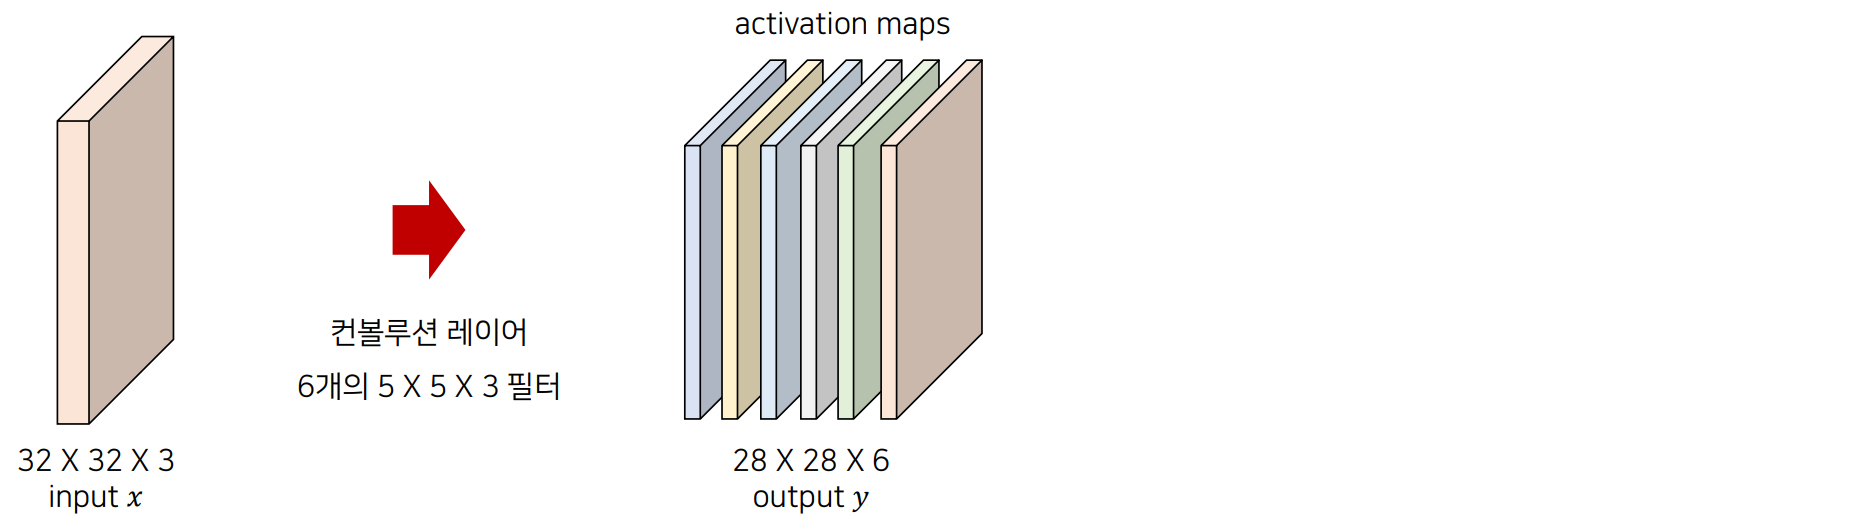

<hr>

* 입력 데이터의 높이: $height$
* 입력 데이터의 너비: $width$
* 필터의 높이: $filter\_height$
* 필터의 너비: $filter\_width$
* 스트라이드(stride): $stride$
* 패딩 크기: $padding$

<hr>

* Convolution 연산 이후의 출력 차원은 다음과 같은 공식으로 계산할 수 있습니다. (나누기할 때 소수점 아래 버림)
    * 출력 높이(output height) = $(height + 2 * padding - filter\\_height) / stride + 1$
    * 출력 너비(output width) = $(width + 2 * padding - filter\\_width) / stride + 1$

* <b>[문제]</b> 다음의 각 경우에 대하여 Convolution 연산을 수행한 뒤의 출력 차원을 쓰세요.
    1. $height=32$, $width=32$, $filter\\_height=5$, $filter\\_width=5$, $stride=2$, $padding=2$일 때 → {답을 쓰세요.}
    2. $height=64$, $width=64$, $filter\\_height=3$, $filter\\_width=3$, $stride=1$, $padding=1$일 때 → {답을 쓰세요.}
    3. $height=16$, $width=16$, $filter\\_height=4$, $filter\\_width=4$, $stride=2$, $padding=1$일 때 → {답을 쓰세요.}
    4. $height=60$, $width=45$, $filter\\_height=8$, $filter\\_width=5$, $stride=3$, $padding=1$일 때 → {답을 쓰세요.}

* (Hint) 다음과 같은 Python 코드를 사용하여 간단히 계산할 수 있습니다.

<pre>
height = 16
width = 16
filter_height = 4
filter_width = 4
stride = 2
padding = 1

output_height = (height + 2 * padding - filter_height) // stride + 1
output_width = (width + 2 * padding - filter_width) // stride + 1

print('출력 높이:', output_height, '출력 너비:', output_width)
</pre>

* 실행 결과 예시

<pre>
출력 높이: 8 출력 너비: 8
</pre>

In [16]:
def compute_dimension(h,w,f_h,f_w,s,p):
    return (h+2*p-f_h)//s + 1 , (w+2*p-f_w)//s + 1

print("[1번] 출력높이 : {} 출력 너비 : {}".format(*compute_dimension(32,32,5,5,2,2)))
print("[2번] 출력높이 : {} 출력 너비 : {}".format(*compute_dimension(64,64,3,3,1,1)))
print("[3번] 출력높이 : {:2} 출력 너비 : {:2}".format(*compute_dimension(16,16,4,4,2,1)))
print("[4번] 출력높이 : {} 출력 너비 : {}".format(*compute_dimension(60,45,8,5,3,1)))

[1번] 출력높이 : 16 출력 너비 : 16
[2번] 출력높이 : 64 출력 너비 : 64
[3번] 출력높이 :  8 출력 너비 :  8
[4번] 출력높이 : 19 출력 너비 : 15


#### <b>(알아보기) Lenet 아키텍처 이해하기</b>

* 기본적인 LeNet 아키텍처를 이해할 수 있습니다.
    * Convolutional Neural Network를 최초로(1998년) 적용한 간단한 아키텍처입니다.
    * Convolution 연산과 Pooling 연산이 사용됩니다.
* <b>아래의 표</b>와 같은 아키텍처를 PyTorch로 구현한 것을 확인해 봅시다.
    * 원본 논문과 완전히 동일하지는 않지만, 핵심 아이디어를 잘 표현한 아키텍처입니다.
    * PyTorch에서는 모델에 별도로 Softmax 레이어를 두지 않고, 학습할 때 nn.CrossEntropyLoss()를 사용하는 것이 일반적입니다.

Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution | # of kernel: 20, kernel size: 5 X 5, stride: 1, zero padding: 0
3 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
4 | Convolution | # of kernel: 50, kernel size: 5 X 5, stride: 1, zero padding: 0
5 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
6 | Fully Connected | # of neuron: 500
7 | Activation | ReLU
8 | Fully Connected | # of neuron: 6
9 | Softmax | 6 classes



In [17]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # → 차원(dimension): (3 x 64 x 64)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5, stride=1, padding=0)
        # → 차원(dimension): (20 x 60 x 60)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (20 x 30 x 30)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1, padding=0)
        # → 차원(dimension): (50 x 26 x 26)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (50 x 13 x 13)
        self.fc1 = nn.Linear(50 * 13 * 13, 500)
        # → 차원(dimension): (500)
        self.fc2 = nn.Linear(500, 6)
        # → 차원(dimension): (6)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = torch.flatten(x, 1) # 배치(batch)를 제외한 모든 차원 flatten하기
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### <b>(알아보기) 학습 및 평가 함수 이해하기</b>

* 별도의 학습(train) 함수와 평가(validate) 함수를 작성합니다.

In [19]:
def train(net, epoch, optimizer, criterion, train_dataloader):
    print('[ Train epoch: %d ]' % epoch)
    net.train() # 모델을 학습 모드로 설정
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # 기울기(gradient) 초기화

        outputs = net(inputs) # 모델 입력하여 결과 계산
        loss = criterion(outputs, targets) # 손실(loss) 값 계산
        loss.backward() # 역전파를 통해 기울기(gradient) 계산

        optimizer.step() # 계산된 기울기를 이용해 모델 가중치 업데이트
        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Train accuarcy:', 100. * correct / total)
    print('Train average loss:', train_loss / total)
    return (100. * correct / total, train_loss / total)


def validate(net, epoch, val_dataloader):
    print('[ Validation epoch: %d ]' % epoch)
    net.eval() # 모델을 평가 모드로 설정
    val_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(val_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = net(inputs) # 모델 입력하여 결과 계산
        val_loss += criterion(outputs, targets).item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Accuarcy:', 100. * correct / total)
    print('Average loss:', val_loss / total)
    return (100. * correct / total, val_loss / total)

#### <b>(알아보기) LeNet 학습하기</b>

* 앞서 정의한 LeNet 네트워크를 학습합니다.
* 학습률(learning rate)을 수정해보면서 결과를 확인해 봅시다.
    * 만약 학습률이 너무 크다면, 발산하여 손실(loss) 값이 NaN으로 나오며 학습이 안 될 수 있습니다.

In [20]:
import time
import torch.optim as optim


net = LeNet()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "LeNet.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 49.24781683422617
Train average loss: 0.020481202680593787
[ Validation epoch: 1 ]
Accuarcy: 59.75931904901673
Average loss: 0.017118001022680365
Model saved! (time elapsed: 32.522504568099976)
[ Train epoch: 1 ]
Train accuarcy: 56.7256182578704
Train average loss: 0.017707309282350026
[ Validation epoch: 2 ]
Accuarcy: 61.57910184913413
Average loss: 0.015738470588641536
Model saved! (time elapsed: 56.307950258255005)
[ Train epoch: 2 ]
Train accuarcy: 59.9398253467381
Train average loss: 0.016523527781506876
[ Validation epoch: 3 ]
Accuarcy: 67.88963897857353
Average loss: 0.014268915167574243
Model saved! (time elapsed: 85.3206467628479)
[ Train epoch: 3 ]
Train accuarcy: 61.495560284728846
Train average loss: 0.01584796546586254
[ Validation epoch: 4 ]
Accuarcy: 69.9735837980628
Average loss: 0.012893427842377847
Model saved! (time elapsed: 110.99640488624573)
[ Train epoch: 4 ]
Train accuarcy: 63.30813825493505
Train average loss: 0.01511594680029

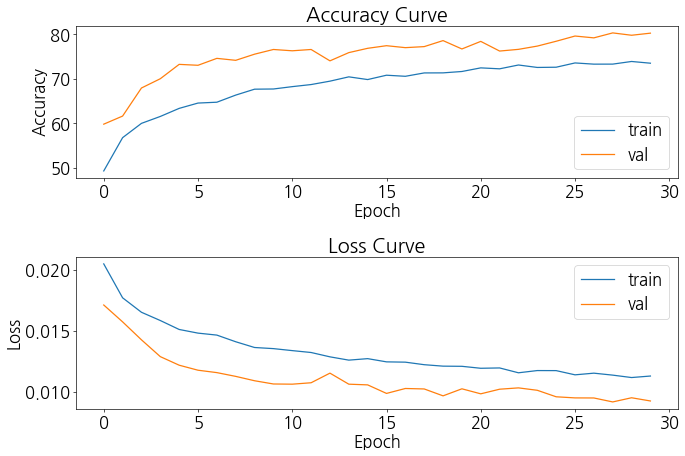

In [25]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

#### <b>(알아보기) 혼동 행렬 시각화하기</b>

* 참고: [Seaborn.heatmap 공식 문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 
* 각 클래스에 대하여 정확히 분류하는지 확인하기 위해 <b>혼동 행렬(confusion matrix)</b>을 생성할 수 있습니다.

In [14]:
# 네트워크에 데이터셋을 입력하여 혼동 행렬(confusion matrix)을 계산하는 함수
def get_confusion_matrix(net, num_classes, data_loader):
    net.eval() # 모델을 평가 모드로 설정
    confusion_matrix = torch.zeros(num_classes, num_classes, dtype=torch.int32)

    for batch_idx, (inputs, targets) in enumerate(data_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = net(inputs)
        _, predicted = outputs.max(1)

        for t, p in zip(targets.view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

    return confusion_matrix

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


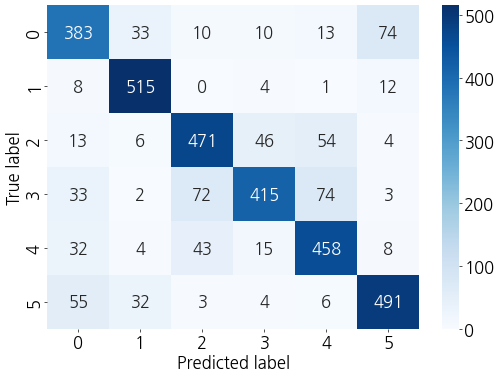

[ 각 클래스에 따른 정확도 ]
tensor([0.7323, 0.9537, 0.7929, 0.6928, 0.8179, 0.8308])
[ 전체 평균 정확도 ]
tensor(0.8022)


In [67]:
import pandas as pd
import seaborn as sns


net = LeNet()
net = net.to(device)

file_name = "./checkpoint/LeNet.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 3. CustomLeNet 아키텍처 작성하기</b>

* 다음과 같이 LeNet 아키텍처를 변경하여 CustomLeNet을 만들어 봅시다.
    * 커널 크기와 커널의 개수를 증가시켰습니다. (파라미터 수 증가)
    * Fully Connected 레이어의 차원을 증가시켰습니다. (파라미터 수 증가)

Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution | # of kernel: 128, kernel size: 8 X 8, stride: 1, zero padding: 0
3 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
4 | Convolution | # of kernel: 256, kernel size: 8 X 8, stride: 1, zero padding: 0
5 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
6 | Convolution | # of kernel: 512, kernel size: 4 X 4, stride: 1, zero padding: 0
7 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
8 | Fully Connected | # of neuron: 4096
9 | Activation | ReLU
10 | Fully Connected | # of neuron: 6
11 | Softmax | 6 classes


In [30]:
# FC-layer를 spinal net 구조로 학습
# 기존의 FC-layer는 4,228,506개의 파라미터
# spinal 구조는 507,846개의 파라미터

class CustomLeNet(nn.Module):
    def __init__(self):
        super(CustomLeNet, self).__init__()
        # → 차원(dimension): (3 x 64 x 64)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5, stride=1, padding=0)
        # → 차원(dimension): (20 x 60 x 60)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (20 x 30 x 30)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1, padding=0)
        # → 차원(dimension): (50 x 26 x 26)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (50 x 13 x 13)


        self.half_in_size = round(50 * 13 * 13/2)
        self.layer_width = 30
        # 
    
        self.fc1 = nn.Linear(self.half_in_size, self.layer_width)
        self.fc2 = nn.Linear(self.half_in_size+self.layer_width, self.layer_width)
        self.fc3 = nn.Linear(self.half_in_size+self.layer_width, self.layer_width)
        self.fc4 = nn.Linear(self.half_in_size+self.layer_width, self.layer_width)
        self.out = nn.Linear(4*self.layer_width, 6)
        # → 차원(dimension): (6)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = torch.flatten(x, 1) # 배치(batch)를 제외한 모든 차원 flatten하기

        x1 = F.relu(self.fc1(x[:, 0:self.half_in_size]))
        x2 = F.relu(self.fc2(torch.cat([ x[:,self.half_in_size:2*self.half_in_size], x1], dim=1)))
        x3 = F.relu(self.fc3(torch.cat([ x[:,0:self.half_in_size], x2], dim=1)))
        x4 = F.relu(self.fc4(torch.cat([ x[:,self.half_in_size:2*self.half_in_size], x3], dim=1)))
        
        x = torch.cat([x1, x2], dim=1)
        x = torch.cat([x, x3], dim=1)
        x = torch.cat([x, x4], dim=1)

        x = self.out(x)
        return x

#### <b>(알아보기) CustomLeNet 평가하기</b>

* 새롭게 작성한 CustomLeNet과 앞선 LeNet의 성능을 비교합니다.
    * 파라미터가 증가한 만큼 성능 향상이 있는지 확인해 봅시다.
* 아래 코드를 실행하여 학습 및 성능 평가를 진행할 수 있습니다.

In [31]:
import time
import torch.optim as optim


net = CustomLeNet()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "CustomLeNet.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 44.91817714830851
Train average loss: 0.021669001697208
[ Validation epoch: 1 ]
Accuarcy: 56.00234810683886
Average loss: 0.017942328203938592
Model saved! (time elapsed: 24.370005130767822)
[ Train epoch: 1 ]
Train accuarcy: 54.75159609598591
Train average loss: 0.0182712862092173
[ Validation epoch: 2 ]
Accuarcy: 64.19137070736718
Average loss: 0.015823470975843943
Model saved! (time elapsed: 49.323076009750366)
[ Train epoch: 2 ]
Train accuarcy: 57.554854333308874
Train average loss: 0.01726418429165652
[ Validation epoch: 3 ]
Accuarcy: 66.04050484297035
Average loss: 0.014411693081885165
Model saved! (time elapsed: 71.92675685882568)
[ Train epoch: 3 ]
Train accuarcy: 58.912453217876276
Train average loss: 0.01650225951717615
[ Validation epoch: 4 ]
Accuarcy: 68.59407103023187
Average loss: 0.013316875264061697
Model saved! (time elapsed: 95.73880219459534)
[ Train epoch: 4 ]
Train accuarcy: 61.25339399721142
Train average loss: 0.0158960374320009

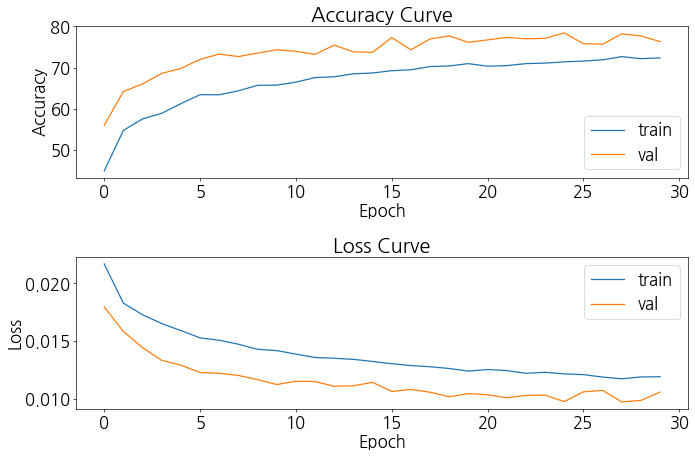

In [32]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


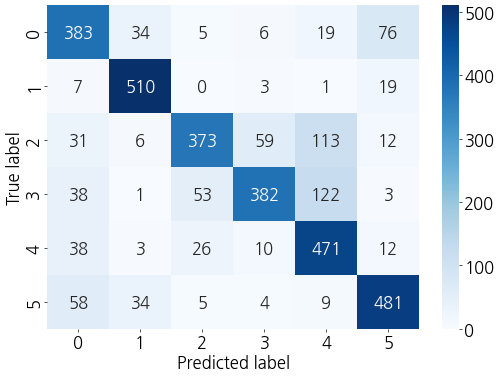

[ 각 클래스에 따른 정확도 ]
tensor([0.7323, 0.9444, 0.6279, 0.6377, 0.8411, 0.8139])
[ 전체 평균 정확도 ]
tensor(0.7631)


In [33]:
import pandas as pd
import seaborn as sns


net = CustomLeNet()
net = net.to(device)

file_name = "./checkpoint/CustomLeNet.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 4. AlexNet 아키텍처 작성하기</b>

* AlexNet은 CNN 기반의 분류 모델의 우수성을 전 세계에 알린 논문([NIPS 2012](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf))입니다.
    * ImageNet 분류 대회(ILSVRC 2012)에서 압도적인 성능으로 우승(1위)을 차지했습니다.

<hr>

* LRN (Local Response Normalization)을 활용합니다.
    * PyTorch에서 [nn.LocalResponseNorm()](https://pytorch.org/docs/stable/generated/torch.nn.LocalResponseNorm.html)을 이용해 구현할 수 있습니다.
    * Local Response Normalization은 입력과 출력의 차원이 동일한 레이어입니다.
* Dropout을 활용합니다.
    * PyTorch에서 [nn.Dropout()](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)을 이용해 구현할 수 있습니다.
* ReLU를 적극적으로 활용합니다.
    * PyTorch에서 [nn.ReLU()](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)를 이용해 구현할 수 있습니다.

<hr>

* <b>아래의 표</b>와 같은 아키텍처를 PyTorch로 구현해 봅시다.
    * 원본 논문에서 제안한 것과 완전히 동일한 아키텍처는 아니지만, 핵심 아이디어를 잘 포함하고 있습니다.

Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution | # of kernel: 96, kernel size: 5 X 5, stride: 1, zero padding: 2
3 | Activation | ReLU
4 | Normalization | LRN (Local Response Normalization), size: 5
5 | Pooling | max pooling, kernel size: 3 X 3, stride: 2
6 | Convolution | # of kernel: 256, kernel size: 5 X 5, stride: 1, zero padding: 2
7 | Activation | ReLU
8 | Normalization | LRN (Local Response Normalization), size: 5
9 | Pooling | max pooling, kernel size: 3 X 3, stride: 2
10 | Convolution | # of kernel: 384, kernel size: 3 X 3, stride: 1, zero padding: 1
11 | Activation | ReLU
12 | Convolution | # of kernel: 384, kernel size: 3 X 3, stride: 1, zero padding: 1
13 | Activation | ReLU
14 | Convolution | # of kernel: 256, kernel size: 3 X 3, stride: 1, zero padding: 1
15 | Activation | ReLU
16 | Pooling | max pooling, kernel size: 3 X 3, stride: 2
17 | Fully Connected | # of neuron: 4096
18 | Activation | ReLU
19 | Dropout | Probability: 0.5
20 | Fully Connected | # of neuron: 6
21 | Dropout | Probability: 0.5
22 | Softmax | 6 classes

* 표와 동일하게 정상적으로 구현했다면, <b>83~85%가량의 정확도</b>를 얻을 수 있습니다.

In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # 이 부분에 소스코드를 작성하세요.

    def forward(self, x):
        # 이 부분에 소스코드를 작성하세요.
        return x

#### <b>(알아보기) AlexNet 평가하기</b>

* 아래 코드를 실행하여 학습 및 성능 평가를 진행할 수 있습니다.
* 83~85%가량의 정확도가 나오지 않는다면, 표와 동일하게 AlexNet 코드를 다시 작성했는지 확인해 주세요.

In [ ]:
import time
import torch.optim as optim


net = AlexNet()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "AlexNet.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

In [ ]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns


net = AlexNet()
net = net.to(device)

file_name = "./checkpoint/AlexNet.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>(알아보기) LightResNet 아키텍처 살펴보기</b>

* [ResNet (2016 CVPR)](https://arxiv.org/abs/1512.03385) 논문에서 제안된 가벼운 ResNet을 PyTorch로 구현한 것은 다음과 같습니다.
    * 원본 논문에서는 CIFAR-10을 위하여 해당 아키텍처를 제안했습니다.
* 레이어의 깊이에 따라 다양한 버전이 있습니다.
    * 다양한 버전: 20 레이어, 32 레이어, 44 레이어, 56 레이어, 110 레이어
    * 일반적으로 더 깊은 레이어로 구성된 ResNet이 더 높은 정확도를 보입니다.

In [34]:
# ResNet을 위한 BasicBlock 클래스 정의
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()

        # 3x3 필터를 사용 (stride 값이 2라면, 너비와 높이가 절반으로 감소)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        # 3x3 필터를 사용 (stride 값이 1이므로, 너비와 높이가 유지)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        self.shortcut = nn.Sequential() # identity인 경우
        if stride != 1: # stride가 1이 아니라면, identity mapping이 아닌 경우
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, padding=0, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x) # (핵심) skip connection
        out = F.relu(out)
        return out


# LightResNet 클래스 정의
class LightResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=6):
        super(LightResNet, self).__init__()
        self.in_planes = 16

        # 16개의 3x3 필터(filter)를 사용
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        # 첫 레이어를 제외하고는 너비와 높이를 줄이기 위해 stride를 2로 설정
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1) # 첫째 블록만 너비와 높이 감소
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1) # 배치(batch)를 제외한 모든 차원 flatten하기
        out = self.linear(out)
        return out


def LightResNet20():
    return LightResNet(BasicBlock, [3, 3, 3])


def LightResNet32():
    return LightResNet(BasicBlock, [5, 5, 5])


def LightResNet44():
    return LightResNet(BasicBlock, [7, 7, 7])


def LightResNet56():
    return LightResNet(BasicBlock, [9, 9, 9])


def LightResNet110():
    return LightResNet(BasicBlock, [18, 18, 18])

#### <b>(알아보기) LightResNet-20 학습하기</b>

* PyTorch로 구현된 LightResNet-20 모델을 학습해 봅시다.

In [35]:
import time
import torch.optim as optim


net = LightResNet20()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "LightResNet20.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 52.40331694430176
Train average loss: 0.018605581538521675
[ Validation epoch: 1 ]
Accuarcy: 60.02348106838861
Average loss: 0.015006367503144645
Model saved! (time elapsed: 24.172844409942627)
[ Train epoch: 1 ]
Train accuarcy: 64.21075805386366
Train average loss: 0.014595044129853765
[ Validation epoch: 2 ]
Accuarcy: 62.987965952450836
Average loss: 0.016064921379229314
Model saved! (time elapsed: 46.53501796722412)
[ Train epoch: 2 ]
Train accuarcy: 68.4156454098481
Train average loss: 0.013099772547681762
[ Validation epoch: 3 ]
Accuarcy: 63.604343997651895
Average loss: 0.014692349240756783
Model saved! (time elapsed: 69.64085388183594)
[ Train epoch: 3 ]
Train accuarcy: 71.73258971160196
Train average loss: 0.011918050742266576
[ Validation epoch: 4 ]
Accuarcy: 71.79336659818021
Average loss: 0.011426001411048345
Model saved! (time elapsed: 93.53481554985046)
[ Train epoch: 4 ]
Train accuarcy: 73.53782930945916
Train average loss: 0.01128649704

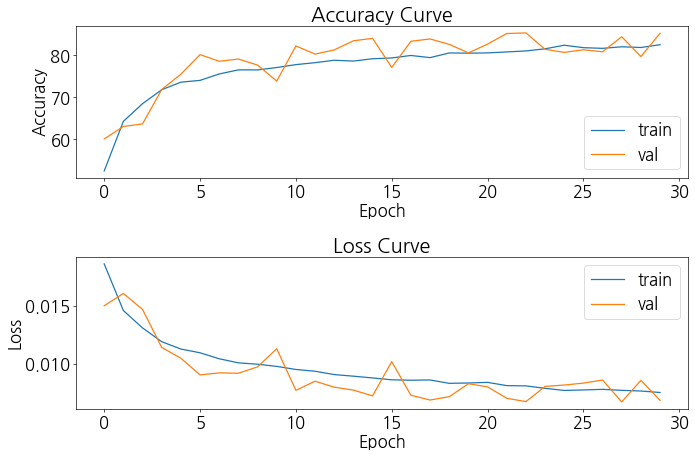

In [36]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


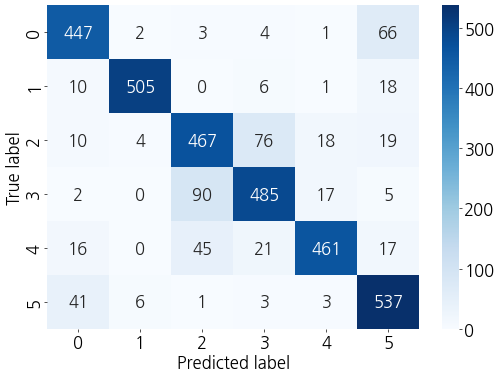

[ 각 클래스에 따른 정확도 ]
tensor([0.8547, 0.9352, 0.7862, 0.8097, 0.8232, 0.9086])
[ 전체 평균 정확도 ]
tensor(0.8518)


In [37]:
import pandas as pd
import seaborn as sns


net = LightResNet20()
net = net.to(device)

file_name = "./checkpoint/LightResNet20.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 5. 다양한 레이어 깊이에 따라 LightResNet 학습하기</b>

* Residual Block을 사용하는 경우 깊이가 깊어져도 좋은 성능을 내는 경향이 있습니다.
* 다음의 LightResNet 모델들에 대하여 각각 학습을 진행한 뒤에, 검증 정확도(validation accuracy)를 쓰세요.
    * LightResNet32: {답을 쓰세요.}
    * LightResNet56: {답을 쓰세요.}
    * LightResNet110: {답을 쓰세요.}
* 레이어가 깊어짐에 따라서 성능이 좋아지나요? {답을 쓰세요.}
    * 그 이유는: {답을 쓰세요.}

In [ ]:
for model_name in [32,44,56,110]:
    if model_name == 32:
        net = LightResNet32()
        net = net.to(device)
        file_name = "LightResNet32.pt"
    elif model_name == 44:
        net = LightResNet44()
        net = net.to(device)
        file_name = "LightResNet44.pt"
    elif model_name == 56:
        net = LightResNet56()
        net = net.to(device)
        file_name = "LightResNet56.pt"
    elif model_name == 110:
        net = LightResNet110()
        net = net.to(device)
        file_name = "LightResNet110.pt"


    epoch = 30
    learning_rate = 0.002

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

    train_result = []
    val_result = []

    print(f'{file_name}훈련 시작 ---------------------------------------------------------------------------------------')
    start_time = time.time() # 시작 시간

    for i in range(epoch):
        train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
        val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

        # 학습된 모델 저장하기
        state = {
            'net': net.state_dict()
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/' + file_name)
        print(f'Model saved! (time elapsed: {time.time() - start_time})')

        # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
        train_result.append((train_acc, train_loss))
        val_result.append((val_acc, val_loss))
    print('----------------------------------------------------------------------------------------------------------------')

In [70]:
for model_name in [32,44,56,110]:
    if model_name == 32:
        net = LightResNet32()
        net = net.to(device)
        file_name = "LightResNet32.pt"
    elif model_name == 44:
        net = LightResNet44()
        net = net.to(device)
        file_name = "LightResNet44.pt"
    elif model_name == 56:
        net = LightResNet56()
        net = net.to(device)
        file_name = "LightResNet56.pt"
    elif model_name == 110:
        net = LightResNet110()
        net = net.to(device)
        file_name = "LightResNet110.pt"    
    
    checkpoint = torch.load("./checkpoint/"+file_name)
    net.load_state_dict(checkpoint['net'])

    # 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
    confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
    
    print("[ 각 클래스에 따른 정확도 ]")
    # (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
    print(confusion_matrix.diag() / confusion_matrix.sum(1))

    print("[ 전체 평균 정확도 ]")
    print(confusion_matrix.diag().sum() / confusion_matrix.sum())

[ 각 클래스에 따른 정확도 ]
tensor([0.9140, 0.9574, 0.8064, 0.7429, 0.8571, 0.8105])
[ 전체 평균 정확도 ]
tensor(0.8447)
[ 각 클래스에 따른 정확도 ]
tensor([0.9407, 0.8852, 0.7323, 0.8581, 0.8536, 0.7056])
[ 전체 평균 정확도 ]
tensor(0.8259)
[ 각 클래스에 따른 정확도 ]
tensor([0.6864, 0.9648, 0.7088, 0.8464, 0.9304, 0.8562])
[ 전체 평균 정확도 ]
tensor(0.8321)
[ 각 클래스에 따른 정확도 ]
tensor([0.2639, 0.9352, 0.7290, 0.6778, 0.6804, 0.8443])
[ 전체 평균 정확도 ]
tensor(0.6933)


#### <b>(알아보기) ResNet 아키텍처 살펴보기</b>

* [ResNet (2016 CVPR)](https://arxiv.org/abs/1512.03385) 논문에서 제안된 기본적인 ResNet의 핵심 아이디어를 PyTorch로 구현한 것은 다음과 같습니다.
    * LightResNet에 비하여 <b>커널의 개수(number of kernels)가 많은</b> 것을 확인할 수 있습니다.
    * 따라서 ImageNet과 같은 큰 규모의 데이터셋에 대해서 사용하기에 적합합니다.
* (참고) [PyTorch 공식 ResNet 소스 코드](https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py)

In [18]:
# ResNet 클래스 정의
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=6):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # 64개의 3x3 필터(filter)를 사용
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        # 첫 레이어를 제외하고는 너비와 높이를 줄이기 위해 stride를 2로 설정
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1) # 첫째 블록만 너비와 높이 감소
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1) # 배치(batch)를 제외한 모든 차원 flatten하기
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

#### <b>(알아보기) ResNet-18 학습하기</b>

* PyTorch로 구현된 ResNet-18 모델을 학습해 봅시다.

In [19]:
import time
import torch.optim as optim


net = ResNet18()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "ResNet18.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 54.634182138401705
Train average loss: 0.03552350132220593
[ Validation epoch: 1 ]
Accuarcy: 64.04461402993836
Average loss: 0.030625102927267008
Model saved! (time elapsed: 56.392067432403564)
[ Train epoch: 1 ]
Train accuarcy: 66.28017905628532
Train average loss: 0.027683555574666258
[ Validation epoch: 2 ]
Accuarcy: 76.22541825653067
Average loss: 0.020909708783813402
Model saved! (time elapsed: 112.09643793106079)
[ Train epoch: 2 ]
Train accuarcy: 70.65384897629706
Train average loss: 0.024552799536580516
[ Validation epoch: 3 ]
Accuarcy: 75.72644555327267
Average loss: 0.020803920747529105
Model saved! (time elapsed: 168.0892436504364)
[ Train epoch: 3 ]
Train accuarcy: 73.06083510677331
Train average loss: 0.022823793206008802
[ Validation epoch: 4 ]
Accuarcy: 75.2861755209862
Average loss: 0.020782165577028867
Model saved! (time elapsed: 224.10530710220337)
[ Train epoch: 4 ]
Train accuarcy: 75.04953401335584
Train average loss: 0.02116022261

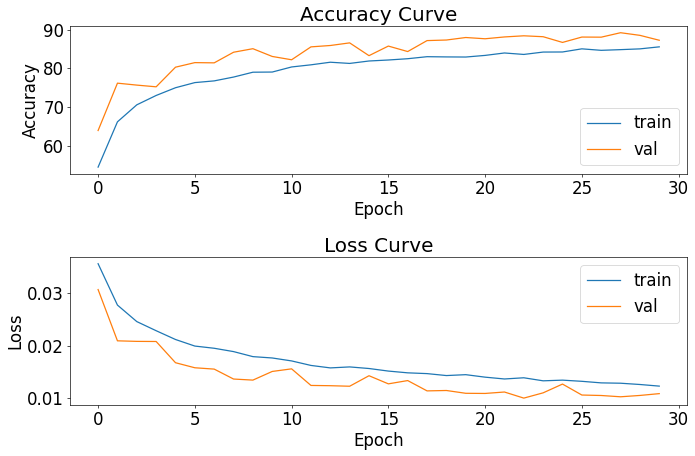

In [20]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


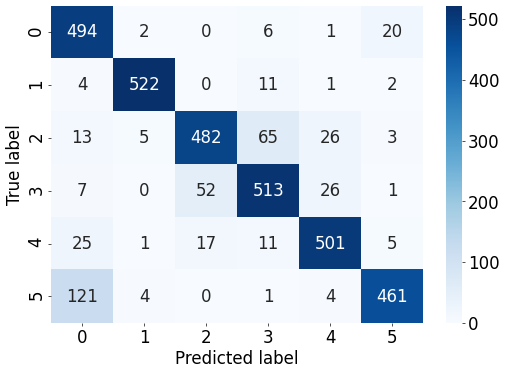

[ 각 클래스에 따른 정확도 ]
tensor([0.9446, 0.9667, 0.8114, 0.8564, 0.8946, 0.7800])
[ 전체 평균 정확도 ]
tensor(0.8726)


In [21]:
import pandas as pd
import seaborn as sns


net = ResNet18()
net = net.to(device)

file_name = "./checkpoint/ResNet18.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>(알아보기) Input Mixup 살펴보기</b>

* Mixup은 대표적인 데이터 증진(data augmentation) 기법으로 정확도 향상에 도움이 됩니다.
    * 일반적으로 Mixup을 사용하는 경우 더 많은 횟수(1.5배가량)의 epoch이 요구됩니다.

In [22]:
mixup_alpha = 1.0


def mixup_data(x, y):
    lam = np.random.beta(mixup_alpha, mixup_alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).cuda()
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


def train_with_mixup(net, epoch, optimizer, criterion, train_dataloader):
    print('[ Train epoch: %d ]' % epoch)
    net.train() # 모델을 학습 모드로 설정
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(inputs, targets) # Mixup 진행
        optimizer.zero_grad() # 기울기(gradient) 초기화

        outputs = net(inputs) # 모델 입력하여 결과 계산
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam) # 손실(loss) 값 계산
        loss.backward() # 역전파를 통해 기울기(gradient) 계산

        optimizer.step() # 계산된 기울기를 이용해 모델 가중치 업데이트
        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())

    print('Train accuarcy:', 100. * correct / total)
    print('Train average loss:', train_loss / total)
    return (100. * correct / total, train_loss / total)

#### <b>Problem 6. Mixup 결과 분석하기</b>

* Mixup을 사용하여 ResNet-18에 대하여 50번 epoch만큼 학습을 진행한 뒤에 성능이 얼마나 개선되었는지 쓰세요.
    * Mixup을 적용했을 때의 검증 정확도(validation accuracy): {답을 쓰세요.}

#### <b>(알아보기) Transfer Learning 살펴보기</b>

* 전이 학습(Transfer Learning)은 <b>단기간에 우수한 정확도</b>를 얻기 위해 효과적으로 사용할 수 있는 기법입니다.
    * 본 실습에서는 미세 조정(fine-tuning) 기법을 사용합니다.
    * 적은 epoch만으로도 빠르게 수렴합니다.
* 전이 학습을 위해서는, 사전 학습된(pre-trained) 네트워크와 동일한 크기의 입력 차원을 갖도록 <b>데이터셋을 수정</b>해야 합니다.
    * ResNet 특성상 데이터셋 수정 없이도 동작할 수 있지만, 일반적으로 데이터셋을 수정합니다.
* (참고) [PyTorch 공식 Transfer Learning 튜토리얼](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
* 기본적인 Transfer Learning을 이용해 91~93%의 정확도를 얻을 수 있습니다.

In [22]:
transforms_train_transferred = transforms.Compose([
    transforms.RandomResizedCrop((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_val_transferred = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset_transferred = datasets.ImageFolder(train_path, transforms_train_transferred)
val_dataset_transferred = datasets.ImageFolder(val_path, transforms_val_transferred)

train_dataloader_transferred = torch.utils.data.DataLoader(train_dataset_transferred, batch_size=16, shuffle=True, num_workers=2)
val_dataloader_transferred = torch.utils.data.DataLoader(val_dataset_transferred, batch_size=16, shuffle=True, num_workers=2)

print('Training dataset size:', len(train_dataset_transferred))
print('Validation dataset size:', len(val_dataset_transferred))

class_names = train_dataset_transferred.classes
print('Class names:', class_names)

Training dataset size: 13627
Validation dataset size: 3407
Class names: ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']


In [23]:
net = torchvision.models.resnet18(pretrained=True)

# 마지막 레이어의 차원을 6차원으로 조절
num_features = net.fc.in_features
net.fc = nn.Linear(num_features, 6)
net = net.to(device)

epoch = 20
learning_rate = 0.001 # 일반적으로 fine-tuning을 진행할 때는 학습률(learning rate)을 낮게 설정
file_name = "ResNet18Transferred.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader_transferred) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader_transferred) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

c:\Users\minki\miniconda3\envs\dl_venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\minki\miniconda3\envs\dl_venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\minki/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 43.8MB/s]


[ Train epoch: 0 ]


KeyboardInterrupt: 

#### <b>Problem 7. State-of-the-Art 성능 만들기</b>

* SOTA 수준의 성능을 만들어 보세요.
* (참고) Transfer Learning과 Mixup을 함께 사용해 보세요.
    * 더 큰 규모의 사전 학습된 모델(ResNet-50 이상)을 이용해 보세요.
* (참고) learning rate scheduler를 사용해 보세요.

<pre>
def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 20:
        lr /= 8
    if epoch >= 40:
        lr /= 8
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
</pre>

* 대회(competition)에 참여하고 있다고 생각하고, <b>94% 이상의 정확도</b>를 만들어 보세요.
    * 내 모델의 검증 정확도(validation accuracy): {답을 쓰세요.}


In [7]:
def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 15:
        lr /= 10
    if epoch >= 35:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [16]:
import torch
from torchvision import datasets, transforms

transforms_train_transferred = transforms.Compose([
    transforms.RandomResizedCrop((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_val_transferred = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset_transferred = datasets.ImageFolder(train_path, transforms_train_transferred)
val_dataset_transferred = datasets.ImageFolder(val_path, transforms_val_transferred)

train_dataloader_transferred = torch.utils.data.DataLoader(train_dataset_transferred, batch_size=32, shuffle=True, num_workers=2)
val_dataloader_transferred = torch.utils.data.DataLoader(val_dataset_transferred, batch_size=32, shuffle=True, num_workers=2)

print('Training dataset size:', len(train_dataset_transferred))
print('Validation dataset size:', len(val_dataset_transferred))

class_names = train_dataset_transferred.classes
print('Class names:', class_names)

Training dataset size: 13627
Validation dataset size: 3407
Class names: ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']


In [9]:
def train(net, epoch, optimizer, criterion, train_dataloader):
    print('[ Train epoch: %d ]' % epoch)
    net.train() # 모델을 학습 모드로 설정
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # 기울기(gradient) 초기화

        outputs = net(inputs) # 모델 입력하여 결과 계산
        loss = criterion(outputs, targets) # 손실(loss) 값 계산
        loss.backward() # 역전파를 통해 기울기(gradient) 계산

        optimizer.step() # 계산된 기울기를 이용해 모델 가중치 업데이트
        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('==========Train accuarcy:', 100. * correct / total,'==========')
    print('Train average loss:', train_loss / total)
    return (100. * correct / total, train_loss / total)


def validate(net, epoch, val_dataloader):
    print('[ Validation epoch: %d ]' % epoch)
    net.eval() # 모델을 평가 모드로 설정
    val_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(val_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = net(inputs) # 모델 입력하여 결과 계산
        val_loss += criterion(outputs, targets).item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Accuarcy:', 100. * correct / total)
    print('Average loss:', val_loss / total)
    return (100. * correct / total, val_loss / total)

In [10]:
mixup_alpha = 1.0


def mixup_data(x, y):
    lam = np.random.beta(mixup_alpha, mixup_alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).cuda()
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


def train_with_mixup(net, epoch, optimizer, criterion, train_dataloader):
    print('[ Train epoch: %d ]' % epoch)
    net.train() # 모델을 학습 모드로 설정
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(inputs, targets) # Mixup 진행
        optimizer.zero_grad() # 기울기(gradient) 초기화

        outputs = net(inputs) # 모델 입력하여 결과 계산
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam) # 손실(loss) 값 계산
        loss.backward() # 역전파를 통해 기울기(gradient) 계산

        optimizer.step() # 계산된 기울기를 이용해 모델 가중치 업데이트
        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())

    print('Train accuarcy:', 100. * correct / total)
    print('Train average loss:', train_loss / total)
    return (100. * correct / total, train_loss / total)

In [84]:
import time
import torch.optim as optim
import efficientnet_pytorch

net = efficientnet_pytorch.EfficientNet.from_pretrained('efficientnet-b0')
net._fc = nn.Linear(in_features=1280, out_features=6, bias=True)
net = net.to(device)

epoch = 300
learning_rate = 0.01
file_name = "efficient"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    adjust_learning_rate(optimizer, i)
    train_acc, train_loss = train_with_mixup(net, i, optimizer, criterion, train_dataloader_transferred) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader_transferred) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name + '{0:0=2d}.pt'.format(i))
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

Loaded pretrained weights for efficientnet-b0
[ Train epoch: 0 ]
Train accuarcy: 59.41687325635148
Train average loss: 0.07282392842374037
[ Validation epoch: 1 ]
Accuarcy: 88.20076313472264
Average loss: 0.025945854630503865
Model saved! (time elapsed: 87.37186455726624)
[ Train epoch: 1 ]
Train accuarcy: 63.37068511442932
Train average loss: 0.0665722973166326
[ Validation epoch: 2 ]
Accuarcy: 89.87378925741122
Average loss: 0.02645563607363537
Model saved! (time elapsed: 176.8771460056305)
[ Train epoch: 2 ]
Train accuarcy: 65.18470113011152
Train average loss: 0.06341623233805804
[ Validation epoch: 3 ]
Accuarcy: 90.37276196066921
Average loss: 0.022052518380486025
Model saved! (time elapsed: 266.02411365509033)
[ Train epoch: 3 ]
Train accuarcy: 65.82691066382651
Train average loss: 0.062260308907440894
[ Validation epoch: 4 ]
Accuarcy: 90.98914000587027
Average loss: 0.021272708656660512
Model saved! (time elapsed: 354.8412489891052)
[ Train epoch: 4 ]
Train accuarcy: 66.40079956

KeyboardInterrupt: 

평가

In [10]:
import efficientnet_pytorch

teacher_model = efficientnet_pytorch.EfficientNet.from_pretrained('efficientnet-b0')
teacher_model._fc = nn.Linear(in_features=1280, out_features=6, bias=True)
file_name = "./checkpoint/efficient33.pt"
checkpoint = torch.load(file_name)
teacher_model.load_state_dict(checkpoint['net'])
teacher_model = teacher_model.to(device)

Loaded pretrained weights for efficientnet-b0


In [11]:
criterion = nn.CrossEntropyLoss()

def validate(net, epoch, val_dataloader):
    print('[ Validation epoch: %d ]' % epoch)
    net.eval() # 모델을 평가 모드로 설정
    val_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(val_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = net(inputs) # 모델 입력하여 결과 계산
        val_loss += criterion(outputs, targets).item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Accuarcy:', 100. * correct / total)
    print('Average loss:', val_loss / total)
    return (100. * correct / total, val_loss / total)

결과!!!!!!

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


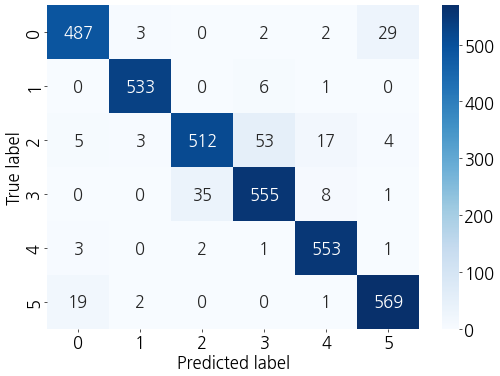

[ 각 클래스에 따른 정확도 ]
tensor([0.9312, 0.9870, 0.8620, 0.9265, 0.9875, 0.9628])
[ 전체 평균 정확도 ]
tensor(0.9419)


In [17]:
import pandas as pd
import seaborn as sns
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(teacher_model, 6, val_dataloader_transferred)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

In [18]:
from torchsummary import summary
summary(teacher_model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1          [-1, 3, 225, 225]               0
Conv2dStaticSamePadding-2         [-1, 32, 112, 112]             864
       BatchNorm2d-3         [-1, 32, 112, 112]              64
MemoryEfficientSwish-4         [-1, 32, 112, 112]               0
         ZeroPad2d-5         [-1, 32, 114, 114]               0
Conv2dStaticSamePadding-6         [-1, 32, 112, 112]             288
       BatchNorm2d-7         [-1, 32, 112, 112]              64
MemoryEfficientSwish-8         [-1, 32, 112, 112]               0
          Identity-9             [-1, 32, 1, 1]               0
Conv2dStaticSamePadding-10              [-1, 8, 1, 1]             264
MemoryEfficientSwish-11              [-1, 8, 1, 1]               0
         Identity-12              [-1, 8, 1, 1]               0
Conv2dStaticSamePadding-13             [-1, 32, 1, 1]             288
         I

In [26]:
from torchsummary import summary
summary(student_model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1          [-1, 3, 225, 225]               0
Conv2dStaticSamePadding-2         [-1, 32, 112, 112]             864
       BatchNorm2d-3         [-1, 32, 112, 112]              64
MemoryEfficientSwish-4         [-1, 32, 112, 112]               0
         ZeroPad2d-5         [-1, 32, 114, 114]               0
Conv2dStaticSamePadding-6         [-1, 32, 112, 112]             288
       BatchNorm2d-7         [-1, 32, 112, 112]              64
MemoryEfficientSwish-8         [-1, 32, 112, 112]               0
          Identity-9             [-1, 32, 1, 1]               0
Conv2dStaticSamePadding-10              [-1, 8, 1, 1]             264
MemoryEfficientSwish-11              [-1, 8, 1, 1]               0
         Identity-12              [-1, 8, 1, 1]               0
Conv2dStaticSamePadding-13             [-1, 32, 1, 1]             288
         I

distillation

In [22]:
import torch.nn.functional as F
import time
import torch.optim as optim
import efficientnet_pytorch

In [10]:
def validate(net, epoch, val_dataloader):
    print('[ !Validation epoch: %d ]' % epoch)
    net.eval() # 모델을 평가 모드로 설정
    val_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(val_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = net(inputs) # 모델 입력하여 결과 계산
        val_loss += criterion(outputs, targets).item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Accuarcy:', 100. * correct / total)
    print('Average loss:', val_loss / total)
    return (100. * correct / total, val_loss / total)

In [11]:
def distillation(y, labels, teacher_scores, T, alpha):
    return nn.KLDivLoss()(F.log_softmax(y/T), F.softmax(teacher_scores/T)) * (T*T * 2.0 + alpha) + F.cross_entropy(y,labels) * (1.-alpha)

def distill_loss_batch(output, target, teacher_output, loss_fn=distillation, opt=None):
    loss_b = loss_fn(output, target, teacher_output, T=20.0, alpha=0.7)

    if opt is not None:
        opt.zero_grad()
        loss_b.backward()
        opt.step()

    return loss_b.item()

In [12]:
def train_distillation(teacher,student, epoch, optimizer, criterion, train_dataloader):
    print('[ Train epoch: %d ]' % epoch)
    teacher.eval()
    student.train() # 모델을 학습 모드로 설정
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        teacher_output = teacher(inputs).detach()
        student_outputs = student(inputs) # 모델 입력하여 결과 계산

        loss = distill_loss_batch(student_outputs, targets, teacher_output, loss_fn=distillation, opt=optimizer)

        train_loss += loss
        _, predicted = student_outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Train accuarcy:', 100. * correct / total)
    print('Train average loss:', train_loss / total)
    return (100. * correct / total, train_loss / total)

In [13]:
# distillation
teacher_model = efficientnet_pytorch.EfficientNet.from_pretrained('efficientnet-b0')
teacher_model._fc = nn.Linear(in_features=1280, out_features=6, bias=True)
file_name = "./checkpoint/efficient33.pt"
checkpoint = torch.load(file_name)
teacher_model.load_state_dict(checkpoint['net'])
teacher_model = teacher_model.to(device)

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


In [24]:
class CustomLeNet(nn.Module):
    def __init__(self):
        super(CustomLeNet, self).__init__()


        self.half_in_size = round(1280/2)
        self.layer_width = 20
        # 
        self.fc1 = nn.Linear(self.half_in_size, self.layer_width)
        self.fc2 = nn.Linear(self.half_in_size+self.layer_width, self.layer_width)
        self.fc3 = nn.Linear(self.half_in_size+self.layer_width, self.layer_width)
        self.fc4 = nn.Linear(self.half_in_size+self.layer_width, self.layer_width)
        self.out = nn.Linear(4*self.layer_width, 6)
        # → 차원(dimension): (6)

    def forward(self, x):
        x = torch.flatten(x, 1) # 배치(batch)를 제외한 모든 차원 flatten하기

        x1 = F.relu(self.fc1(x[:, 0:self.half_in_size]))
        x2 = F.relu(self.fc2(torch.cat([ x[:,self.half_in_size:2*self.half_in_size], x1], dim=1)))
        x3 = F.relu(self.fc3(torch.cat([ x[:,0:self.half_in_size], x2], dim=1)))
        x4 = F.relu(self.fc4(torch.cat([ x[:,self.half_in_size:2*self.half_in_size], x3], dim=1)))
        
        x = torch.cat([x1, x2], dim=1)
        x = torch.cat([x, x3], dim=1)
        x = torch.cat([x, x4], dim=1)

        x = self.out(x)
        return x

In [25]:
student_model = efficientnet_pytorch.EfficientNet.from_pretrained('efficientnet-b0')
student_model._fc = CustomLeNet()
student_model = student_model.to(device)

Loaded pretrained weights for efficientnet-b0


In [ ]:
epoch = 300
learning_rate = 0.01
file_name = "student"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(student_model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    adjust_learning_rate(optimizer, i)
    train_acc, train_loss = train_distillation(teacher_model,student_model, i, optimizer, criterion, train_dataloader_transferred) # 학습(training)
    val_acc, val_loss = validate(student_model, i + 1, val_dataloader_transferred) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': student_model.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name + '{0:0=2d}.pt'.format(i))
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))